### data efficiency

In [1]:
import numpy as np
import matplotlib.pyplot as plt



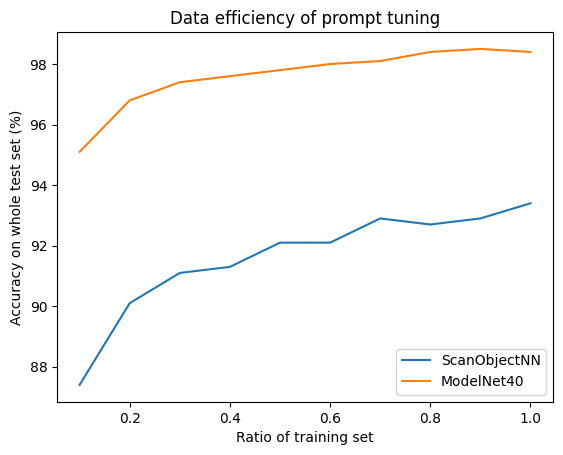

In [2]:
x = np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0])
mn = np.array([95.1, 96.8, 97.4, 97.6, 97.8, 98.0, 98.1, 98.4, 98.5, 98.4])
so = np.array([87.4, 90.1, 91.1, 91.3, 92.1, 92.1, 92.9, 92.7, 92.9, 93.4])

plt.plot(x, so, label="ScanObjectNN")
plt.plot(x, mn, label="ModelNet40")

plt.xlabel('Ratio of training set')
plt.ylabel('Accuracy on whole test set (%)')
plt.title('Data efficiency of prompt tuning')
plt.legend()

plt.show()

### prompt length

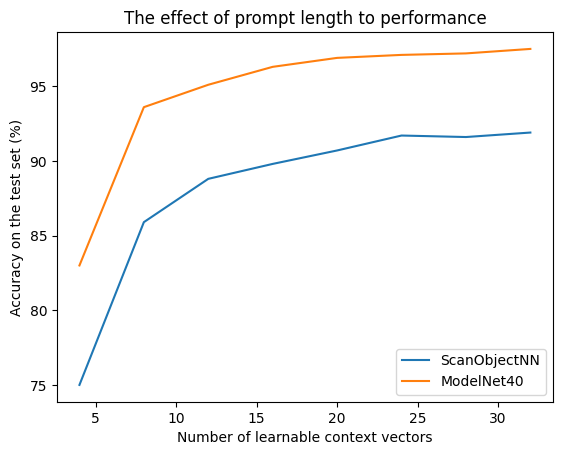

In [4]:
x = np.array([4,8,12,16,20,24,28,32])
mn = np.array([83.0, 93.6, 95.1, 96.3, 96.9, 97.1, 97.2, 97.5])
so = np.array([75.0, 85.9, 88.8, 89.8, 90.7, 91.7, 91.6, 91.9])

plt.plot(x, so, label="ScanObjectNN")
plt.plot(x, mn, label="ModelNet40")

plt.xlabel('Number of learnable context vectors')
plt.ylabel('Accuracy on the test set (%)')
plt.title('The effect of prompt length to performance')
plt.legend()

plt.show()

### class name position

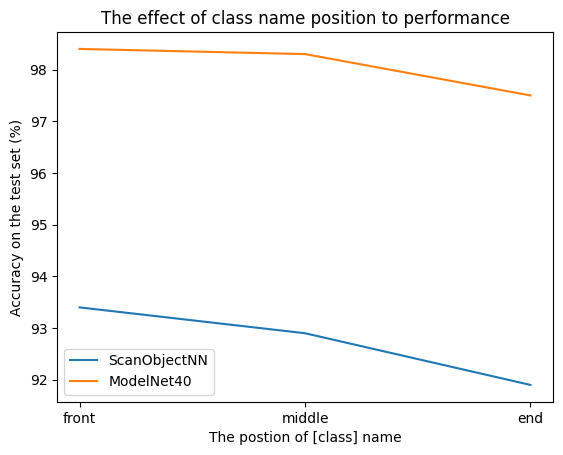

In [9]:
x = np.array(['front','middle','end'])
mn = np.array([98.4, 98.3, 97.5])
so = np.array([93.4, 92.9, 91.9])

plt.plot(x, so, label="ScanObjectNN")
plt.plot(x, mn, label="ModelNet40")

plt.xlabel('The postion of [class] name')
plt.ylabel('Accuracy on the test set (%)')
plt.title('The effect of class name position to performance')
plt.legend()

plt.show()

### Few-shot learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### modelnet40

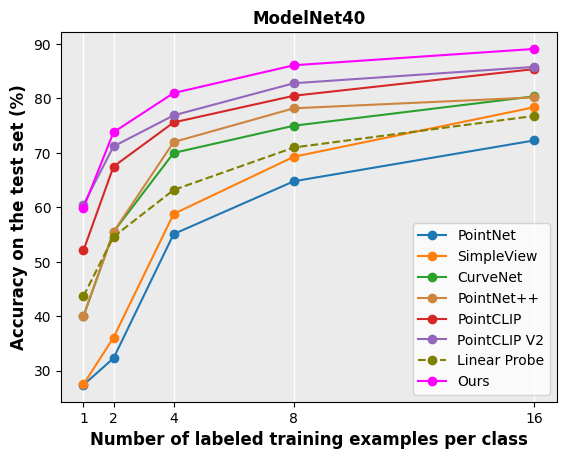

In [2]:
fig, ax = plt.subplots()
ax.set_facecolor("#EBEBEB")

shots = [1, 2, 4, 8, 16]
x = np.array(shots)

pn_mn = np.array([27.4, 32.3, 55.1, 64.8, 72.3])
sv_mn = np.array([27.5, 36.1, 58.8, 69.3, 78.4])
cn_mn = np.array([40.0, 55.5, 70.0, 75.0, 80.4])
pn2_mn = np.array([40.1, 55.5, 72.0, 78.2, 80.2])
pc_mn = np.array([52.1, 67.5, 75.6, 80.5, 85.4])
pc2_mn = np.array([60.5, 71.2, 76.9, 82.8, 85.8])   # 自己跑出来的，`resnet101` as image encoder
lp_mn = np.array([43.7, 54.6, 63.2, 71.0, 76.8])
# ours_mn = np.array([56.93, 71.8, 81.1, 84.4, 88.3])   # prompt & last attention block
ours_mn = np.array([59.9, 73.8, 81.0, 86.1, 89.1])      # prompt & `2-layer mlp` in last transformer block

ax.set_xticks(shots)
ax.set_xticklabels(shots)

ax.plot(x, pn_mn, label="PointNet", marker='o', )
ax.plot(x, sv_mn, label="SimpleView", marker='o', )
ax.plot(x, cn_mn, label="CurveNet", marker='o', )
ax.plot(x, pn2_mn, label="PointNet++", marker='o', color='peru')
ax.plot(x, pc_mn, label="PointCLIP", marker='o', )
ax.plot(x, pc2_mn, label="PointCLIP V2", marker='o', )
ax.plot(x, lp_mn, label="Linear Probe", marker='o', color='olive', linestyle='dashed')
ax.plot(x, ours_mn, label="Ours", marker='o', color='magenta')

ax.set_xlabel('Number of labeled training examples per class', fontweight='bold', fontsize=12)
ax.set_ylabel('Accuracy on the test set (%)', fontweight='bold', fontsize=12)
ax.grid(axis="x", color="white", linewidth=1)
ax.set_title('ModelNet40', fontweight='bold', fontsize=12)
ax.legend()

fig.savefig('images/mn40_fs.pdf', dpi=400.0, bbox_inches='tight')
# fig.savefig('images/mn40_fs.png', dpi=400.0, bbox_inches='tight')

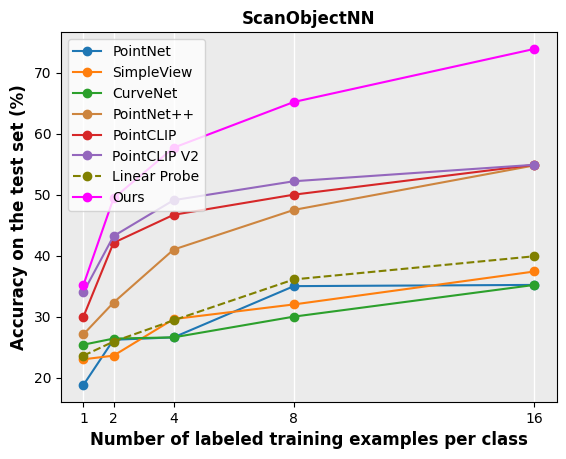

In [3]:
fig, ax = plt.subplots()
ax.set_facecolor("#EBEBEB")

shots = [1, 2, 4, 8, 16]
x = np.array(shots)

pn_so = np.array([18.8, 26.2, 26.6, 35.0, 35.2])    # 从pointclip v2, 这几个数看不清
sv_so = np.array([23.0, 23.6, 29.6, 32.0, 37.4])    # 这几个数看不清
cn_so = np.array([25.4, 26.4, 26.6, 30.0, 35.2])    # 这几个数看不清
pn2_so = np.array([27.1, 32.3, 41.0, 47.5, 54.8])
pc_so = np.array([30.0, 42.1, 46.7, 50.0, 54.9])    # 这是报告的结果，实际跑出来低很多
pc2_so = np.array([34.0, 43.2, 49.1, 52.2, 54.9])   # 这个结果从论文拿的，没跑过，感觉有点高；跑出来差的离谱，resnet101做骨干网
linear_probe = np.array([23.6, 25.9, 29.4, 36.1, 39.9])
# ours_so = np.array([32.4, 48.1, 55.5, 65.1, 72.2])    # prompt & last attention block
ours_so = np.array([35.2, 49.4, 57.7, 65.2, 73.9])      # prompt & `2-layer mlp` in last transformer block

ax.set_xticks(shots)
ax.set_xticklabels(shots)

ax.plot(x, pn_so, label="PointNet", marker='o')
ax.plot(x, sv_so, label="SimpleView", marker='o')
ax.plot(x, cn_so, label="CurveNet", marker='o')
ax.plot(x, pn2_so, label="PointNet++", marker='o', color='peru')
ax.plot(x, pc_so, label="PointCLIP", marker='o')
ax.plot(x, pc2_so, label="PointCLIP V2", marker='o')
ax.plot(x, linear_probe, label="Linear Probe", marker='o', color='olive', linestyle='dashed')
ax.plot(x, ours_so, label="Ours", marker='o', color='magenta')

ax.set_xlabel('Number of labeled training examples per class', fontweight='bold', fontsize=12)
ax.set_ylabel('Accuracy on the test set (%)', fontweight='bold', fontsize=12)
ax.grid(axis="x", color="white", linewidth=1)
ax.set_title('ScanObjectNN', fontweight='bold', fontsize=12)
ax.legend()

fig.savefig('images/sonn_fs.pdf', dpi=400.0, bbox_inches='tight')
# fig.savefig('images/sonn_fs.png', dpi=400.0, bbox_inches='tight')

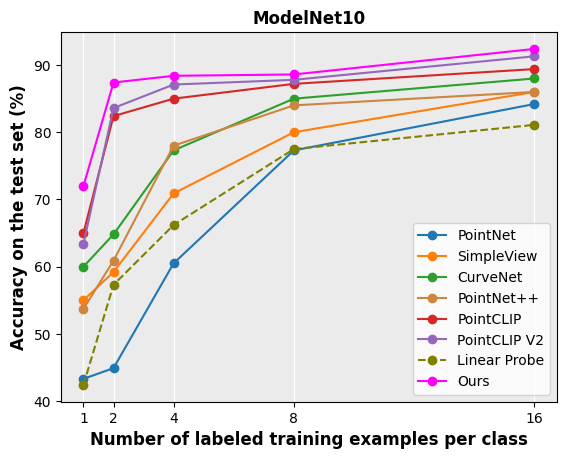

In [ ]:
'''
    NOTE modelnet10 相对简单，调优 last attention block 中的 2-layer mlp 就能取得较好结果
        下面报告的本文方法就是这么做的
'''
fig, ax = plt.subplots()
ax.set_facecolor("#EBEBEB")

shots = [1, 2, 4, 8, 16]
x = np.array(shots)

pn_mn10 = np.array([43.3, 44.9, 60.5, 77.3, 84.2])
sv_mn10 = np.array([55.0, 59.2, 70.9, 80.0, 86.0])
cn_mn10 = np.array([60.0, 64.8, 77.3, 85.0, 88.0])
pn2_mn10 = np.array([53.7, 60.9, 78.0, 84.0, 86.0])
pc_mn10 = np.array([65.0, 82.4, 85.0, 87.2, 89.4])  # pointclip 论文明确说了用 `resnet101` as image encoder；不太相信这个结果
pc2_mn10 = np.array([63.4, 83.6, 87.1, 87.8, 91.3])   # pointclip v2 跑出来的结果，`resnet101` as image encoder
lp_mn10 = np.array([42.4, 57.3, 66.2, 77.5, 81.1])  # 自己跑出来的
# ours_mn = np.array([56.2, 72.3, 76.9, 87.3, 89.9])    # prompt_only
# ours_mn = np.array([60.4, 85.1, 86.7, 88.9, 92.5])  # prompt & last transformer block, batch size: 50
ours_mn = np.array([72.0, 87.4, 88.4, 88.6, 92.4])  # prompt & `2-layer mlp` in last transformer block, batch size: 50

ax.set_xticks(shots)
ax.set_xticklabels(shots)

ax.plot(x, pn_mn10, label="PointNet", marker='o', )
ax.plot(x, sv_mn10, label="SimpleView", marker='o', )
ax.plot(x, cn_mn10, label="CurveNet", marker='o', )
ax.plot(x, pn2_mn10, label="PointNet++", marker='o', color='peru')
ax.plot(x, pc_mn10, label="PointCLIP", marker='o', )
ax.plot(x, pc2_mn10, label="PointCLIP V2", marker='o', )
ax.plot(x, lp_mn10, label="Linear Probe", marker='o', color='olive', linestyle='dashed')
ax.plot(x, ours_mn, label="Ours", marker='o', color='magenta')

ax.set_xlabel('Number of labeled training examples per class', fontweight='bold', fontsize=12)
ax.set_ylabel('Accuracy on the test set (%)', fontweight='bold', fontsize=12)
ax.grid(axis="x", color="white", linewidth=1)
ax.set_title('ModelNet10', fontweight='bold', fontsize=12)
ax.legend()

# fig.savefig('images/mn10_fs.pdf', dpi=400.0, bbox_inches='tight')
fig.savefig('images/mn10_fs.png', dpi=400.0, bbox_inches='tight')

### Comparison with Different Data Ratios

In [1]:
import matplotlib.pyplot as plt

In [11]:
# data ratio of ulip: 0.05, 0.10, 0.15, 0.2, 0.5, 1.0
ulip_pointbert =    [77.5, 85.0, 89.0, 91.0, 92.5, 94.1]

ppt_base_pointbert = [90.7, 91.3, 91.6, 92.0, 92.1, 93.2]  # data_ratio = 0.05, 0.15 是新跑出来的；data_ratio=1.0 采用的是之前调优的最好结果
ppt_ffn_pointbert = [93.2, 93.5, 93.0, 93.1, 93.1, 93.3]    # 这个实验是 09.12 跑的，在3090, ulip2_data_effi_2
ppt_ptb_pointbert = [93.1, 93.7, 93.6, 93.9, 94.0, 94.1]   # data_ratio = 0.05, 0.15 是新跑出来的

ratio = [5, 10, 15, 20, 50, 100]

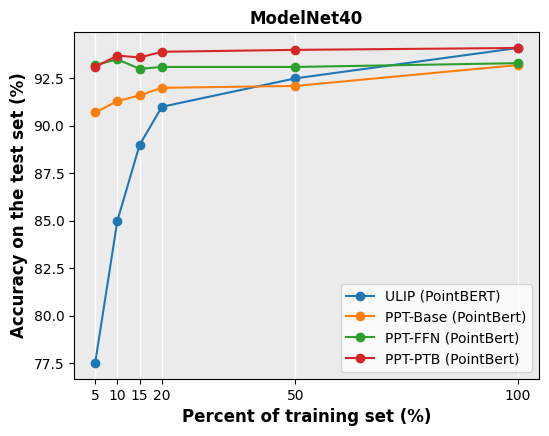

In [12]:
figsize = (6,4.5)
fig, ax = plt.subplots(figsize=figsize)
ax.set_facecolor("#EBEBEB")

ax.set_xticks(ratio)
ax.set_xticklabels(ratio)

ax.plot(ratio, ulip_pointbert, label="ULIP (PointBERT)", marker='o', )
ax.plot(ratio, ppt_base_pointbert, label="PPT-Base (PointBert)", marker='o', )
ax.plot(ratio, ppt_ffn_pointbert, label="PPT-FFN (PointBert)", marker='o', )
ax.plot(ratio, ppt_ptb_pointbert, label="PPT-PTB (PointBert)", marker='o', )

ax.set_xlabel('Percent of training set (%)', fontweight='bold', fontsize=12)
ax.set_ylabel('Accuracy on the test set (%)', fontweight='bold', fontsize=12)
ax.grid(axis="x", color="white", linewidth=1)
ax.set_title('ModelNet40', fontweight='bold', fontsize=12)
ax.legend()

fig.savefig('images/data_effi_mn40.pdf', dpi=400.0, bbox_inches='tight')
# fig.savefig('images/data_effi_mn40.png', dpi=400.0, bbox_inches='tight')

### Prompt Length

In [4]:
import matplotlib.pyplot as plt

In [7]:
length = [4, 8, 16, 32, 64]

mn40_acc = [86.6, 90.6, 91.5, 92.1, 92.4]
sonn_only_acc = [86.9, 89.5, 89.5, 90.2, 90.4]
sonn_bg_acc = [86.6, 88.8, 90.9, 91.7, 90.9]
sonn_pb_acc = [78.7, 81.1, 82.6, 83.5, 83.6]
average = [84.7, 87.5, 88.6, 89.4, 89.3]    # average results of above 4 datasets

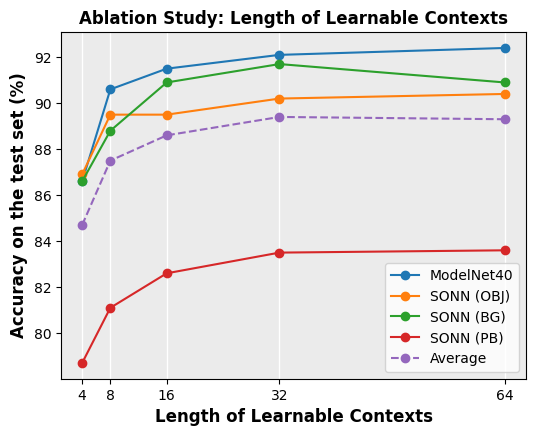

In [8]:
figsize = (6,4.5)
fig, ax = plt.subplots(figsize=figsize)
ax.set_facecolor("#EBEBEB")

ax.set_xticks(length)
ax.set_xticklabels(length)

ax.plot(length, mn40_acc, label="ModelNet40", marker='o', )
ax.plot(length, sonn_only_acc, label="SONN (OBJ)", marker='o', )
ax.plot(length, sonn_bg_acc, label="SONN (BG)", marker='o', )
ax.plot(length, sonn_pb_acc, label="SONN (PB)", marker='o', )
ax.plot(length, average, label="Average", marker='o', linestyle='dashed')

ax.set_xlabel('Length of Learnable Contexts', fontweight ='bold', fontsize=12)
ax.set_ylabel('Accuracy on the test set (%)', fontweight ='bold', fontsize=12)
ax.grid(axis="x", color="white", linewidth=1)
ax.set_title('Ablation Study: Length of Learnable Contexts', fontweight ='bold', fontsize=12)
ax.legend()

fig.savefig('images/ablate_context_len.pdf', dpi=400.0, bbox_inches='tight')
# fig.savefig('images/ablate_context_len.png', dpi=400.0, bbox_inches='tight')

### Image Grid of Partseg

In [23]:
from glob import glob
image_names = glob(f'images/pred_*.png')
print(image_names)

['images/pred_Airplane.png', 'images/pred_Mug.png', 'images/pred_Knife.png', 'images/pred_Laptop.png', 'images/pred_Car.png', 'images/pred_Rocket.png', 'images/pred_Earphone.png', 'images/pred_Motorbike.png', 'images/pred_Table.png', 'images/pred_Chair.png', 'images/pred_Cap.png', 'images/pred_Guitar.png', 'images/pred_Skateboard.png', 'images/pred_Lamp.png', 'images/pred_Bag.png', 'images/pred_Pistol.png']


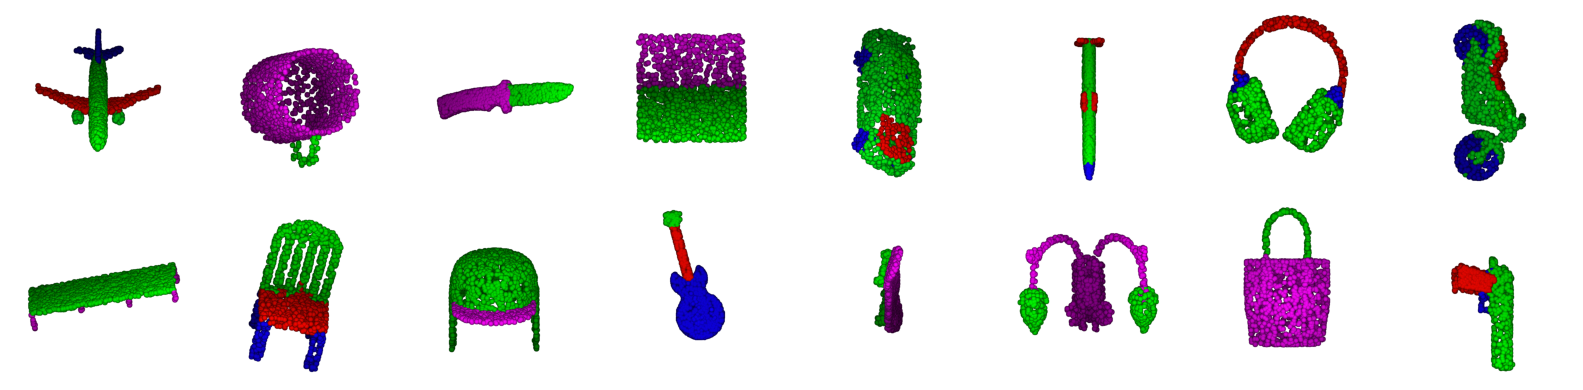

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create a 2x8 grid for the images
num_rows, num_cols = 2, 8

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4))

# Flatten the axes array to easily iterate through them
axes = axes.flatten()

for i in range(num_rows * num_cols):
    # Load an image from a local file (replace 'your_image.png' with your image file path)
    # image_path = 'your_image.png'
    image = mpimg.imread(image_names[i])

    # Plot the image on the current subplot
    axes[i].imshow(image)
    axes[i].axis('off')  # Turn off axis labels and ticks

# Adjust spacing and layout
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.tight_layout()

plt.savefig('images/vis_partseg.pdf', dpi=400.0, bbox_inches='tight', pad_inches=0)

# Show the grid of images
plt.show()


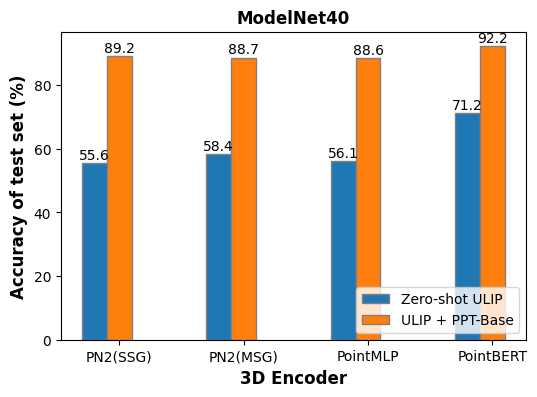

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(6, 4))

# set height of bar
zs_ulip = [55.6, 58.4, 56.1, 71.2]
ulip_ppt = [89.2, 88.7, 88.6, 92.2]

# Set position of bar on X axis
x = [0, 1, 2, 3]
br1 = np.arange(len(x))	# [0, 1, 2, 3, 4]
br2 = [x + barWidth for x in br1]	# [0.25, 1.25, 2.25, 3.25, 4.25]

# Make the plot
plt.bar(br1, zs_ulip, width = barWidth,
		edgecolor ='grey', label ='Zero-shot ULIP')
plt.bar(br2, ulip_ppt, width = barWidth,
		edgecolor ='grey', label ='ULIP + PPT-Base')

for i in x:
    plt.text(i, zs_ulip[i]+0.2, str(zs_ulip[i]), ha='center', va='bottom')
    plt.text(i+barWidth, ulip_ppt[i]+0.2, str(ulip_ppt[i]), ha='center', va='bottom')

# Adding Xticks
# plt.xlabel('3D Encoder', fontweight ='bold', fontsize = 15)
plt.xlabel('3D Encoder', fontweight ='bold', fontsize=12)
# plt.ylabel('Accuracy on ModelNet40 (%)', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy of test set (%)', fontweight ='bold', fontsize=12)
plt.xticks([r + barWidth for r in range(len(x))],
		['PN2(SSG)', 'PN2(MSG)', 'PointMLP', 'PointBERT'])
plt.title('ModelNet40', fontweight ='bold', fontsize=12)

plt.legend(loc='lower right')
plt.savefig('images/prompt_learner_engineer_mn.png', dpi=400.0, bbox_inches='tight')
plt.show()

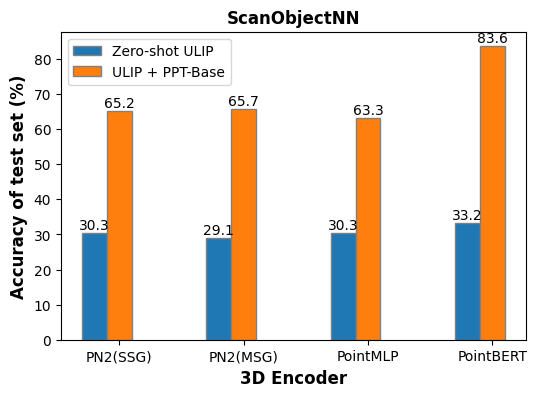

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(6, 4))

# set height of bar
zs_ulip = [30.3, 29.1, 30.3, 33.2]
ulip_ppt = [65.2, 65.7, 63.3, 83.6]

# Set position of bar on X axis
x = [0, 1, 2, 3]
br1 = np.arange(len(x))	# [0, 1, 2, 3, 4]
br2 = [x + barWidth for x in br1]	# [0.25, 1.25, 2.25, 3.25, 4.25]

# Make the plot
plt.bar(br1, zs_ulip, width = barWidth,
		edgecolor ='grey', label ='Zero-shot ULIP')
plt.bar(br2, ulip_ppt, width = barWidth,
		edgecolor ='grey', label ='ULIP + PPT-Base')

for i in x:
    plt.text(i, zs_ulip[i]+0.2, str(zs_ulip[i]), ha='center', va='bottom')
    plt.text(i+barWidth, ulip_ppt[i]+0.2, str(ulip_ppt[i]), ha='center', va='bottom')

# Adding Xticks
# plt.xlabel('3D Encoder', fontweight ='bold', fontsize = 15)
plt.xlabel('3D Encoder', fontweight ='bold', fontsize=12)
# plt.ylabel('Accuracy on ModelNet40 (%)', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy of test set (%)', fontweight ='bold', fontsize=12)
plt.xticks([r + barWidth for r in range(len(x))],
		['PN2(SSG)', 'PN2(MSG)', 'PointMLP', 'PointBERT'])
plt.title('ScanObjectNN', fontweight ='bold', fontsize=12)

plt.legend(loc='best')
plt.savefig('images/prompt_learner_engineer_so.png', dpi=400.0, bbox_inches='tight')
plt.show()

### mn40 and sonn Feature Distribution

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

import torch

In [14]:
# --------- mn40
state_dict = torch.load('modelnet40_test_feats_labels.pt', map_location=torch.device('cpu'))
state_dict.keys()

print(state_dict['test_feats'].shape)
print(state_dict['test_feats'][0].shape)
print(state_dict['test_labels'].shape)
print(state_dict['test_labels'][0].shape)

# 生成t-SNE嵌入特征，feats_test_embedded.shape: (1024, 2)，第一维代表样本数，第二位代表tsne嵌入空间维度
feats_test_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(state_dict['test_feats'])

df = pd.DataFrame()
# y是样本类别，每个样本都有个类别，所以维度是1024
df["label"] = state_dict['test_labels']
df["axis-0"] = feats_test_embedded[:,0]
df["axis-1"] = feats_test_embedded[:,1]

(2468, 40)
(40,)
(2468,)
()


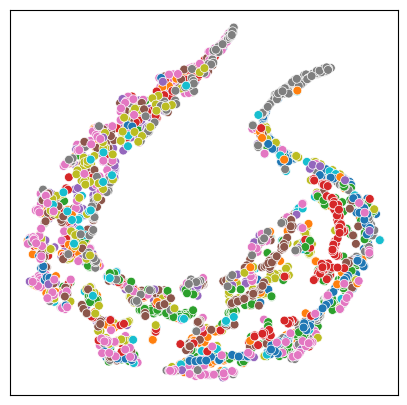

In [17]:
# 控制图片大小
figsize = (5, 5)
fig, ax = plt.subplots(figsize=figsize)
mn_ax = sns.scatterplot(ax=ax, x="axis-0", y="axis-1", hue=df.label.tolist(),
                palette=sns.color_palette(palette=None, n_colors=40), s=40,
                data=df, legend=False)#.set(title="CrossFormer Pretrained Features on ScanObjectNN")
mn_ax.set(xlabel=None)
mn_ax.set(ylabel=None)
plt.xticks([])
plt.yticks([])
plt.show()

mn_fig = mn_ax.get_figure()
mn_fig.savefig('mn40_feats.pdf', dpi=400.0, bbox_inches='tight')

In [18]:
# --------- sonn
state_dict = torch.load('scanobjectnn_test_feats_labels.pt', map_location=torch.device('cpu'))
state_dict.keys()

print(state_dict['test_feats'].shape)
print(state_dict['test_feats'][0].shape)
print(state_dict['test_labels'].shape)
print(state_dict['test_labels'][0].shape)

# 生成t-SNE嵌入特征，feats_test_embedded.shape: (1024, 2)，第一维代表样本数，第二位代表tsne嵌入空间维度
feats_test_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(state_dict['test_feats'])

df = pd.DataFrame()
# y是样本类别，每个样本都有个类别，所以维度是1024
df["label"] = state_dict['test_labels']
df["axis-0"] = feats_test_embedded[:,0]
df["axis-1"] = feats_test_embedded[:,1]

(2882, 15)
(15,)
(2882,)
()


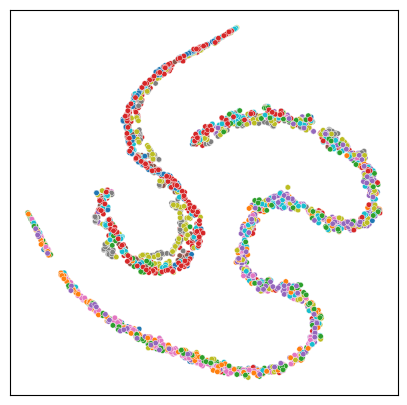

In [19]:
# 控制图片大小
figsize = (5, 5)
fig, ax = plt.subplots(figsize=figsize)
mn_ax = sns.scatterplot(ax=ax, x="axis-0", y="axis-1", hue=df.label.tolist(),
                palette=sns.color_palette(palette=None, n_colors=15), s=15,
                data=df, legend=False)#.set(title="CrossFormer Pretrained Features on ScanObjectNN")
mn_ax.set(xlabel=None)
mn_ax.set(ylabel=None)
plt.xticks([])
plt.yticks([])
plt.show()

mn_fig = mn_ax.get_figure()
mn_fig.savefig('sonn_feats.pdf', dpi=400.0, bbox_inches='tight')

#### NOTE 这个特征很奇怪，和之前vipformer/viewformer的特征很不一样，居然会出现连续的曲线
1. 这可能就是联合 text, image 模态特征联合优化出来的特点吧
2. 从 sns.scatterplot(`n_colors`) 这个参数，发现之前 `viewformer` 的图存在bug，颜色类别数一直设的是40，应当与对应数据集类别保持一致

### Parameter Efficiency

In [60]:
import matplotlib.pyplot as plt

In [75]:
model = ['PointCNN', 'DGCNN', 'PointNeXt', 'OcCo', 'CrossPoint', 'PointBERT', 'PointMAE', 'PointCMT', 'PointM2AE', 'ULIP', 'PPT(Ours)']
param_mn = [0.6, 1.8, 1.4, 3.5, 27.7, 39.1, 22.1, 12.6, 12.9, 39.1, 1.8]
acc_mn = [92.2, 92.9, 93.2, 93.0, 90.3, 93.2, 93.8, 93.5, 93.4, 94.1, 94.1]
marker = ['.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', ]
color = ['blue', 'yellowgreen', 'rosybrown', 'cyan', 'magenta', 'peru', 'orange', 'purple', 'pink', 'brown', 'red']

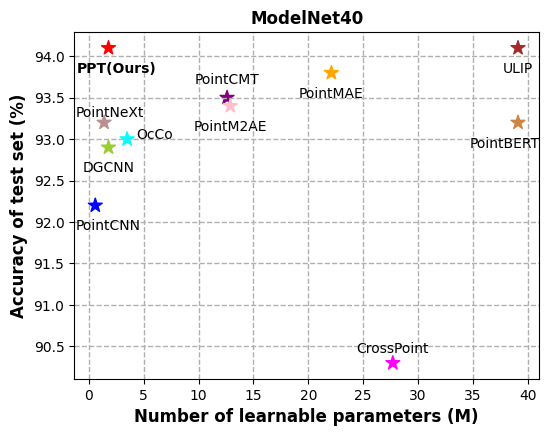

In [76]:
figsize = (6,4.5)
fig, ax = plt.subplots(figsize=figsize)

ax.scatter(param_mn, acc_mn, s=110, marker='*', c=color)
for i in range(len(param_mn)):
    if model[i] == 'PointBERT':
        ax.text(param_mn[i]-1.2, acc_mn[i]-0.3, model[i], ha='center',)
        continue

    if model[i] == 'PointCMT':
        ax.text(param_mn[i], acc_mn[i]+0.3, model[i], ha='center', va='top')
        continue

    if model[i] == 'PointCNN':
        ax.text(param_mn[i]+1.2, acc_mn[i]-0.3, model[i], ha='center')
        continue

    if model[i] == 'PointNeXt':
        ax.text(param_mn[i]+0.5, acc_mn[i]+0.2, model[i], ha='center', va='top')
        continue

    if model[i] == 'OcCo':
        ax.text(param_mn[i]+2.5, acc_mn[i], model[i], ha='center')
        continue

    if model[i] == 'CrossPoint':
        ax.text(param_mn[i], acc_mn[i]+0.25, model[i], ha='center', va='top')
        continue

    if model[i] == 'PPT(Ours)':
        ax.text(param_mn[i]+0.7, acc_mn[i]-0.3, model[i], ha='center', fontweight='bold')
        continue

    ax.text(param_mn[i], acc_mn[i]-0.3, model[i], ha='center')

ax.grid(linestyle='--', linewidth=1.0)
ax.set_xlabel("Number of learnable parameters (M)", fontweight='bold', fontsize=12)
ax.set_ylabel("Accuracy of test set (%)", fontweight='bold', fontsize=12)
ax.set_title('ModelNet40', fontweight='bold', fontsize=12)

fig.savefig('images/param_effi_mn.png', dpi=400.0, bbox_inches='tight', )
plt.show()

In [77]:
model = ['PointCNN', 'DGCNN', 'PointNeXt', 'OcCo', 'ACT', 'PointBERT', 'PointMAE', 'PointCMT', 'PointM2AE', 'ULIP', 'PPT(Ours)']
param_so = [0.6, 1.8, 1.4, 3.5, 22.1, 39.1, 22.1, 12.6, 12.9, 39.1, 1.8]
acc_so = [78.5, 78.1, 87.7, 78.8, 88.2, 83.1, 85.2, 86.4, 86.4, 86.4, 89.1]

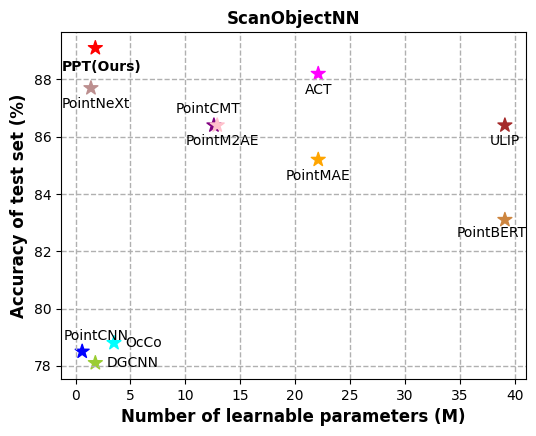

In [80]:
fig, ax = plt.subplots(figsize=figsize)

ax.scatter(param_so, acc_so, s=110, marker='*', c=color)
for i in range(len(param_so)):
    if model[i] == 'PPT(Ours)':
        ax.text(param_so[i]+0.6, acc_so[i]-0.8, model[i], ha='center', fontweight='bold')
        continue

    if model[i] == 'PointNeXt':
        ax.text(param_so[i]+0.4, acc_so[i]-0.7, model[i], ha='center')
        continue

    if model[i] == 'PointCMT':
        ax.text(param_so[i]-0.5, acc_so[i]+0.8, model[i], ha='center', va='top')
        continue

    if model[i] == 'PointM2AE':
        ax.text(param_so[i]+0.5, acc_so[i]-0.8, model[i], ha='center', va='bottom')
        continue

    if model[i] == 'OcCo':
        ax.text(param_so[i]+1.0, acc_so[i], model[i], ha='left', va='center')
        continue

    if model[i] == 'DGCNN':
        ax.text(param_so[i]+1.0, acc_so[i], model[i], ha='left', va='center')
        continue

    if model[i] == 'PointCNN':
        ax.text(param_so[i]+1.3, acc_so[i]+0.8, model[i], ha='center', va='top')
        continue

    if model[i] == 'PointBERT':
        ax.text(param_so[i]-1.2, acc_so[i]-0.7, model[i], ha='center', va='bottom')
        continue

    ax.text(param_so[i], acc_so[i]-0.7, model[i], ha='center')

ax.grid(linestyle='--', linewidth=1.0)
ax.set_xlabel("Number of learnable parameters (M)", fontweight='bold', fontsize=12)
ax.set_ylabel("Accuracy of test set (%)", fontweight='bold', fontsize=12)
ax.set_title('ScanObjectNN', fontweight='bold', fontsize=12)

fig.savefig('images/param_effi_so.png', dpi=400.0, bbox_inches='tight', )
plt.show()

### Data Efficiency

In [4]:
import matplotlib.pyplot as plt

In [5]:
pointcmt_dr = [2, 5, 10, 20, 100]
pointcmt_acc_mn = [73.3, 82.1, 85.1, 88.4, 93.5]

ulip_pointbert_dr = [5, 10, 15, 20, 50, 100]
ulip_pointbert_acc_mn = [77.5, 85.0, 89.0, 91.0, 92.5, 94.1]

ppt_dr = [2, 5, 10, 15, 20, 50, 100]
ppt_base_pointbert = [90.1, 90.7, 91.3, 91.6, 92.0, 92.1, 93.2]
ppt_ffn_pointbert = [92.7, 93.2, 93.5, 93.0, 93.1, 93.1, 93.3]
ppt_ptb_pointbert = [93.0, 93.1, 93.7, 93.6, 93.9, 94.0, 94.1]

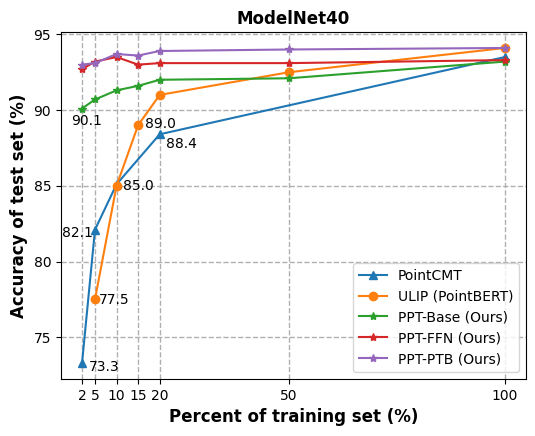

In [9]:
figsize = (6, 4.5)
fig, ax = plt.subplots(figsize=figsize)

ax.plot(pointcmt_dr, pointcmt_acc_mn, label='PointCMT', marker='^')
ax.plot(ulip_pointbert_dr, ulip_pointbert_acc_mn, label='ULIP (PointBERT)', marker='o')
ax.plot(ppt_dr, ppt_base_pointbert, label='PPT-Base (Ours)', marker='*')
ax.plot(ppt_dr, ppt_ffn_pointbert, label='PPT-FFN (Ours)', marker='*')
ax.plot(ppt_dr, ppt_ptb_pointbert, label='PPT-PTB (Ours)', marker='*')

ax.text(3, 88.8, '90.1', ha='center', va='bottom')  # ppt-base, 2%
ax.text(3.5, 72.8, '73.3', ha='left')   # pointcmt, 2%
ax.text(4.5, 81.6, '82.1', ha='right')  # pointcmt, 5%
ax.text(21.5, 87.5, '88.4', ha='left')  # pointcmt, 20%
ax.text(6.0, 77.0, '77.5', ha='left', va='bottom')  # ulip, 5%
ax.text(11.5, 84.5, '85.0', ha='left', va='bottom')  # ulip, 10%
ax.text(16.5, 88.6, '89.0', ha='left', va='bottom')  # ulip, 15%

ax.set_xlabel('Percent of training set (%)', fontweight='bold', fontsize='12')
ax.set_ylabel('Accuracy of test set (%)', fontweight='bold', fontsize='12')
ax.set_title('ModelNet40', fontweight='bold', fontsize='12')
ax.set_xticks([2, 5, 10, 15, 20, 50, 100])
ax.legend(loc='best')
ax.grid(linestyle='--', linewidth=1.0)

fig.savefig('images/data_effi_mn40_new.pdf', dpi=400.0, bbox_inches='tight')
plt.show()